## First Step of data augmentation: Equalizing, Adding Noise, and Sluring the sketch to increase amount of data



In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import choice
import os


Showing what each augmentation does to a sketch

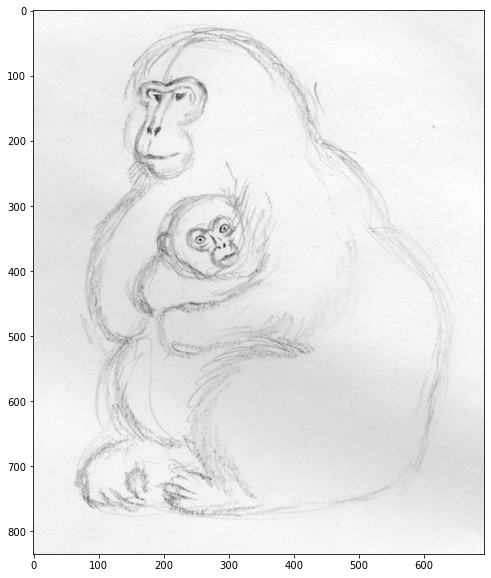

In [40]:
# load a sketch of choice
name = 'N_Inputs/2.jpg'
img = cv2.imread(name, 0)


plt.figure(figsize = (12,10))
plt.imshow(img, cmap = 'gray')

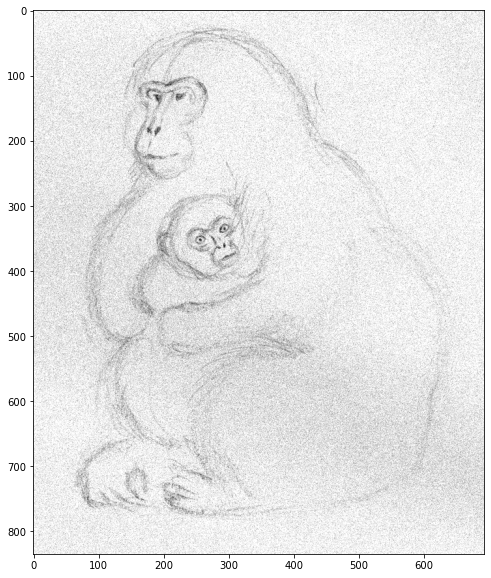

In [20]:
#add noise
mean = 0.0   
std = 20.0    
noisy_img = img + np.random.normal(mean, std, img.shape)
noisy_img_clipped = np.clip(noisy_img, 0, 255)  # we might get out of bounds due to noise


plt.figure(figsize = (12,10))
plt.imshow(noisy_img_clipped, cmap = 'gray')

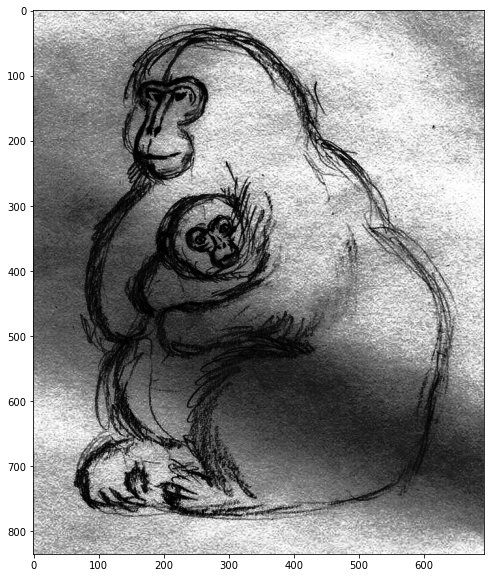

In [18]:
#equalize
img_eq = cv2.equalizeHist(img)
plt.figure(figsize = (12,10))
plt.imshow(img_eq, cmap = 'gray')

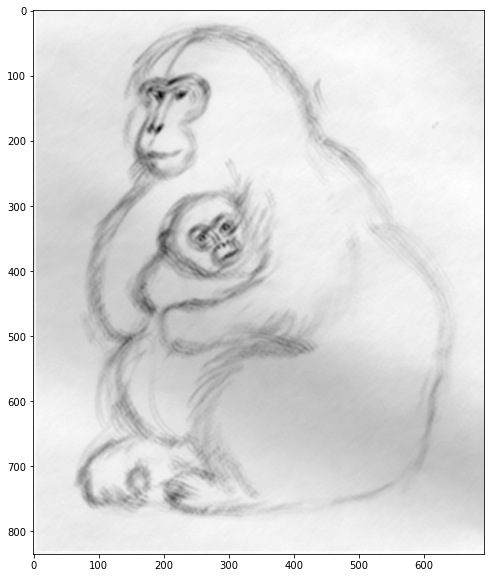

In [41]:
#slurring the image
img_gaus = cv2.GaussianBlur(src= img, ksize = (5,5), sigmaX=10)
img_line_gaus = cv2.GaussianBlur(src= img, ksize = (5,5), sigmaX=10)

cols,rows = img.shape

M = np.float32([[1,0,5],[0,1,-5]])
img_gaus = cv2.warpAffine(img_gaus,M,(rows,cols), borderMode=cv2.BORDER_CONSTANT, borderValue = 255)

img_slur = img_line_gaus + img_gaus
img_slur_clipped = np.clip(img_slur, 0, 255)

plt.figure(figsize = (12,10))
plt.imshow(img_slur , cmap = 'gray')

In [9]:
#creating directories augmented target and inputs
os.mkdir("A_Target") 
os.mkdir("A_Input") 

In [10]:
h = 1
k=1 
for k in range(1,26,1):
    #specify target folder
    name_l = 'N_Targets/{}.jpg'.format(k)
    img_line = cv2.imread(name_l,0)
    
    #specify input folder
    name_s = 'N_Inputs/{}.jpg'.format(k)
    img = cv2.imread(name_s,0)
    
    if (img_line.shape != img.shape ):
        break
        
    #no aug
    
    sfile = 'A_Input/{}.jpg'.format(h)
    cv2.imwrite(sfile, (img))

    lfile = 'A_Target/{}.jpg'.format(h)
    cv2.imwrite(lfile, (img_line))
    
    h= h+1
    
    
    #noise
    mean = 0.0   # some constant
    std = 15.0    # some constant (standard deviation)
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)  # we might get out of bounds due to noise
    
    sfile = 'A_Input/{}.jpg'.format(h)
    cv2.imwrite(sfile, (noisy_img_clipped))

    lfile = 'A_Target/{}.jpg'.format(h)
    cv2.imwrite(lfile, (img_line))
    
    h= h+1
    
    #equalizaation
    img_eq = cv2.equalizeHist(img)
    img_eq_clipped = np.clip(img_eq, 0, 255) 
    
    sfile = 'A_Input/{}.jpg'.format(h)
    cv2.imwrite(sfile, (img_eq_clipped))

    lfile = 'A_Target/{}.jpg'.format(h)
    cv2.imwrite(lfile, (img_line))
    h= h+1
        
    #slur
    img_gaus = cv2.GaussianBlur(src= img, ksize = (5,5), sigmaX=10)
    img_line_gaus = cv2.GaussianBlur(src= img, ksize = (5,5), sigmaX=10)

    cols,rows = img.shape
    
    M = np.float32([[1,0,5],[0,1,-5]])
    img_gaus = cv2.warpAffine(img_gaus,M,(rows,cols), borderMode=cv2.BORDER_CONSTANT, borderValue = 255)

    
    #img_slur = (img_line_gaus/(img_line_gaus.max()))*127 + (img_gaus/(img_gaus.max()))*127
    #img_slur = img_gaus
    img_gaus = img_gaus.astype(float)
    img_line_gaus = img_line_gaus.astype(float)
    img_slur = (img_line_gaus)+(img_gaus)
    #img_slur = img_slur.astype(int)
    img_slur_clipped = (img_slur/(img_slur.max()))*255
    
    
    
    sfile = 'A_Input/{}.jpg'.format(h)
    cv2.imwrite(sfile, (img_slur_clipped))

    lfile = 'A_Target/{}.jpg'.format(h)
    cv2.imwrite(lfile, (img_line))
    
    h= h+1
    #print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
